In [115]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [117]:
# Basic Libraries
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# For Model Building
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK stopwords if not already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
import pandas as pd


# Load the dataset
df = pd.read_csv("Phishing_Email.csv")  # Ensure the CSV is in the working directory
df.head()


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


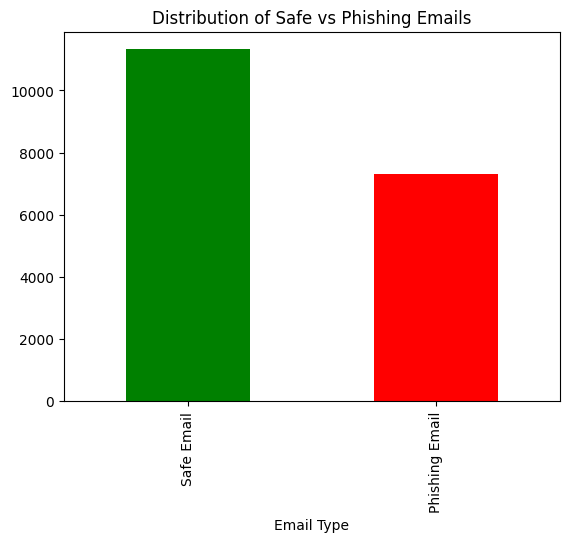

In [121]:

# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# View class distribution
df['Email Type'].value_counts().plot(kind='bar', color=['green', 'red'])

plt.title('Distribution of Safe vs Phishing Emails')
plt.show()


In [123]:
# Drop the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

# Rename columns
df.columns = ['email', 'label']
df.head()


,email,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [125]:
df['label'] = df['label'].map({'Safe Email': 0, 'Phishing Email': 1})
df['label'].value_counts()

label
0    11322
1     7328
Name: count, dtype: int64

In [127]:
df.head()

,email,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


In [129]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Clean and preprocess text
def preprocess(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_email'] = df['email'].apply(preprocess)
df[['clean_email', 'label']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_email,label
0,6 1100 disc uniformitarian 1086 sex lang dick ...,0
1,side galicismo galicismo spanish term name imp...,0
2,equistar deal ticket still avail assist robert...,0
3,hello hot lil horni toy one dream open mind pe...,1
4,softwar incred low price 86 lower draperi seve...,1


In [131]:
df = df.dropna(subset=['email'])  # Drops rows with missing 'email' values

In [133]:
df.isnull()

,email,label,clean_email
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
18645,False,False,False
18646,False,False,False
18647,False,False,False
18648,False,False,False


In [135]:
from sklearn.model_selection import train_test_split

X = df['clean_email']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9613630265629193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2265
           1       0.95      0.96      0.95      1462

    accuracy                           0.96      3727
   macro avg       0.96      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727



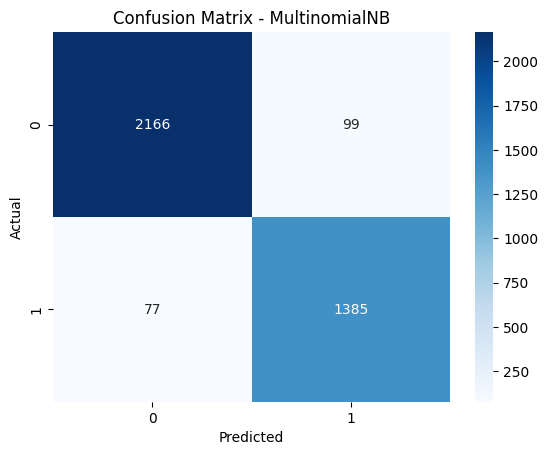

In [141]:
# Confusion Matrix for the best model (example: Naive Bayes)
cm = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [143]:
import joblib

joblib.dump(model, 'phishing_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [145]:
def predict_email(text):
    cleaned = preprocess(text)
    vectorized = vectorizer.transform([cleaned])
    result = model.predict(vectorized)
    return "Phishing Email" if result[0] == 1 else "Safe Email"

# Example:
predict_email("Please verify your account by clicking this link.")


'Phishing Email'

In [209]:
import joblib

# Load model and vectorizer
model = joblib.load('phishing_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to preprocess and predict
def predict_email(text):
    cleaned = preprocess(text)
    vectorized = vectorizer.transform([cleaned])
    result = model.predict(vectorized)
    return "Phishing Email" if result[0] == 1 else "Safe Email"

# Take email content as input from the user
user_input = input("Enter the email content:\n")
prediction = predict_email(user_input)
print("\nPrediction:", prediction)


Enter the email content:
 We noticed a login attempt from an unrecognized device. Reset your password now to protect your account: http://secure-reset-now.com



Prediction: Safe Email


In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to try
param_grid = {
    'C': [0.1, 1, 10],                 # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that work well with small to medium data
    'penalty': ['l2'],                # Type of regularization
    'max_iter': [100, 200, 300]       # Ensure convergence
}

# Create GridSearchCV object
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Optimize for accuracy
    verbose=1,
    n_jobs=-1             # Use all CPU cores
)

# Fit on training data
grid.fit(X_train_vec, y_train)

# Use best estimator found
best_model = grid.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test_vec)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tuned Model Accuracy: 0.9694123960289778

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2265
           1       0.94      0.98      0.96      1462

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

